# Box plots for Education

In [1]:
# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set seed for reproducibility
np.random.seed(0)

In [2]:
df = pd.read_csv('../data/TrainingData.csv',index_col=0)
df.head().T

,134338,206341,326408,364634,47683
Function,Teacher Compensation,NO_LABEL,Teacher Compensation,Substitute Compensation,Substitute Compensation
Use,Instruction,NO_LABEL,Instruction,Instruction,Instruction
Sharing,School Reported,NO_LABEL,School Reported,School Reported,School Reported
Reporting,School,NO_LABEL,School,School,School
Student_Type,NO_LABEL,NO_LABEL,Unspecified,Unspecified,Unspecified
Position_Type,Teacher,NO_LABEL,Teacher,Substitute,Teacher
Object_Type,NO_LABEL,NO_LABEL,Base Salary/Compensation,Benefits,Substitute Compensation
Pre_K,NO_LABEL,NO_LABEL,Non PreK,NO_LABEL,NO_LABEL
Operating_Status,PreK-12 Operating,Non-Operating,PreK-12 Operating,PreK-12 Operating,PreK-12 Operating
Object_Description,NaN,CONTRACTOR SERVICES,Personal Services - Teachers,EMPLOYEE BENEFITS,TEACHER COVERAGE FOR TEACHER


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [4]:
# count the number of different datatypes
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

Our ultimate goal is to predict the probability that a certain label is attached to a budget line item. Many of the columns in our data are the inefficient object type.

There are 9 columns of labels in the dataset that are of interest. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called `LABELS`. We can check out the type for these labels using `df[LABELS].dtypes`.

In [5]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

They are all encoded as an `object` datatype. Because category datatypes are much more efficient, we'll convert the labels to category types using the `.astype()`.

**Note**: 

`.astype()` only works on a pandas `Series`. Since we're working with a pandas DataFrame, we'll need to use the `.apply()` method and provide a `lambda` function called `categorize_label` that applies `.astype()` to each column, `x`.

In [6]:
# define a lambda function that converts the column into a category
categorize_label = lambda x: x.astype('category')

In [7]:
# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)
df[LABELS].dtypes

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object

There are over 100 unique labels in this dataset. We'll explore this fact by counting and plotting the number of unique values for each category of label, our `LABELS` list.

Pandas provides a `pd.Series.nunique` method for counting the number of unique values in a Series which we can take advantage of.

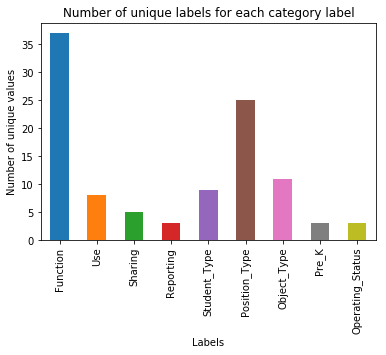

In [8]:
# Calculate number of unique values for each label -
# create the DataFrame 'num_unique_labels' by using the '.apply()' 
# method on df[LABELS] with 'pd.Series.nunique' as the argument.
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.title('Number of unique labels for each category label')
plt.show()

In [9]:
# actual values
df[LABELS].nunique()

Function            37
Use                  8
Sharing              5
Reporting            3
Student_Type         9
Position_Type       25
Object_Type         11
Pre_K                3
Operating_Status     3
dtype: int64

In [10]:
# identify columns with missing data
missing_values = df.isnull().sum()
missing_values

Function                       0
Use                            0
Sharing                        0
Reporting                      0
Student_Type                   0
Position_Type                  0
Object_Type                    0
Pre_K                          0
Operating_Status               0
Object_Description         24784
Text_2                    312060
SubFund_Description        93422
Job_Title_Description     107534
Text_3                    291125
Text_4                    346531
Sub_Object_Description    308674
Location_Description      238223
FTE                       274206
Function_Description       58082
Facility_or_Department    346391
Position_Extra            135513
Total                       4555
Program_Description        95617
Fund_Description          197400
Text_1                    107992
dtype: int64

In [11]:
# compute percentage of missing values
total_cell_num = np.product(df.shape)
total_missing_values = missing_values.sum()

print('Percentage missing:\n', total_missing_values/total_cell_num * 100)

Percentage missing:
 29.400729994478823


### Measuring success

Accuracy is often used as a measure of success. But it can give a misleading impression of the success in a model in predicting a target, since all it tells us is the number of samples we predicited correctly, e.g. if 1% of email is spam(99% is valid) and you created a spam filter just to detect valid mail, it would have an accuracy of 99%, yet miss the spam - the purpose of using it.

A better measure of success is **log loss**. It is a measure of error, which we want to minimize. We use a **loss function** to compute it.

**Log Loss in Binary Classification**

In binary classification, **log loss**:

- takes the actual value, `y`, which can be `1`(yes) or `0`(no)
- the probability, `p`, that is a value from `0` to `1`
- and sums the log loss for each row in the dataset
- then multiply by `-1/N`

![Log Loss](imgs/log-loss-1.png)

We can implement **log loss** function using Numpy:

In [13]:
def compute_log_loss(predicted, actual, eps=1e-14):
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                        + (1 - actual) * np.log(1 - predicted))
    return loss

In [14]:
# results of model prediction:
compute_log_loss(predicted=0.9, actual=0)

2.302585092994046

In [15]:
compute_log_loss(predicted=0.5, actual=1)

0.6931471805599453

Given the following numeric arrays simulating different types of predictions, caculate the **log loss** in each case:

In [16]:
actual_labels = np.array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])
correct_confident = np.array([ 0.95,  0.95,  0.95,  0.95,  0.95,  0.05,  0.05,  0.05,  0.05,  0.05])
correct_not_confident = np.array([ 0.65,  0.65,  0.65,  0.65,  0.65,  0.35,  0.35,  0.35,  0.35,  0.35])
wrong_confident = np.array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.95,  0.95,  0.95,  0.95,  0.95])
wrong_not_confident = np.array([ 0.35,  0.35,  0.35,  0.35,  0.35,  0.65,  0.65,  0.65,  0.65,  0.65])

In [17]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


**Log loss** penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. 